# Stock Market Analysis

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Import Data CSV to DataFrame

In [2]:
df = pd.read_csv('dataset/HistoricalQuotes.csv')

### EDA (Exploratory Data Analysis)

In [3]:
print(df.columns)
df.describe()
df.info()

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Close/Last  2518 non-null   object
 2   Volume      2518 non-null   int64 
 3   Open        2518 non-null   object
 4   High        2518 non-null   object
 5   Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


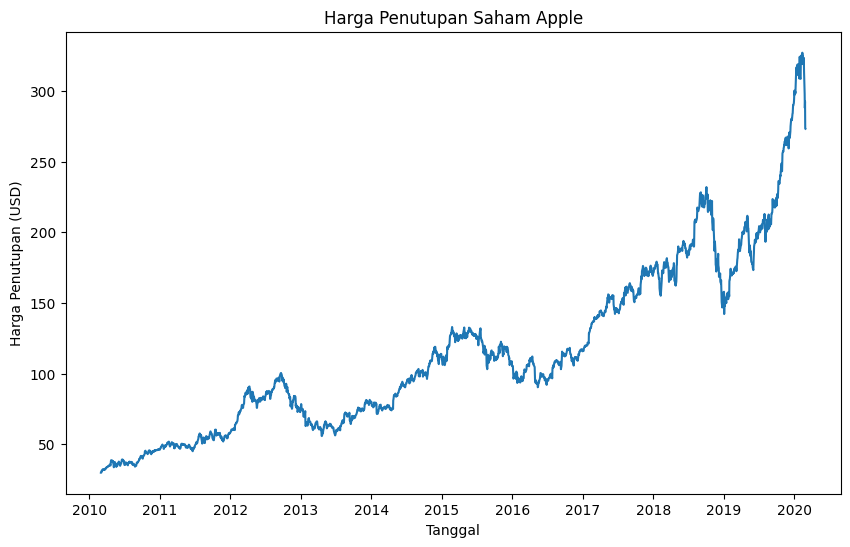

In [5]:
# Parsing kolom Date dan urutkan berdasarkan tanggal
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Hanya menggunakan kolom yang kita butuhkan
df = df[['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Ubah 'Close/Last' ke format numerik
df_numerik = df[['Close/Last', 'Volume', 'Open', 'High', 'Low']].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Visualisasi data harga penutupan
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df_numerik['Close/Last'])
plt.title('Harga Penutupan Saham Apple')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.show()


### Scale

In [30]:
# Normalisasi data (skalakan nilai ke rentang 0 dan 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_numerik[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

### Creat Time Forcasting
#### Untuk membuat model CNN-LSTM, kita perlu mengubah data menjadi jendela waktu (misalnya, menggunakan 30 hari terakhir untuk memprediksi harga di hari berikutnya).

In [7]:
# Fungsi untuk membuat jendela waktu
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps, 0])  # Kolom 0 adalah 'Close/Last'
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(df_numerik, time_steps)

# Membagi data menjadi train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

KeyError: (30, 0)

### Create Model CNN-LSTM

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_39 (Conv1D)              │ (None, 28, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,075 (94.04 KB)

 Trainable params: 24,075 (94.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 3.6450e-04 - val_loss: 6.0887e-04
Epoch 2/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 1.2611e-04 - val_loss: 3.1848e-04
Epoch 3/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 9.5677e-05 - val_loss: 5.2651e-04
Epoch 4/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 8.0420e-05 - val_loss: 2.7133e-04
Epoch 5/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 7.6788e-05 - val_loss: 2.1433e-04
Epoch 6/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 5.9518e-05 - val_loss: 2.5140e-04
Epoch 7/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.4872e-05 - val_loss: 0.0014
Epoch 8/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 6.2557e-05 - val_loss: 4.6810e-04
Epoch 9/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 5.7621e-05 - val_loss: 2.3285e-04
Epoch 10/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 5.2224e-05 - val_loss: 2.0622e-04


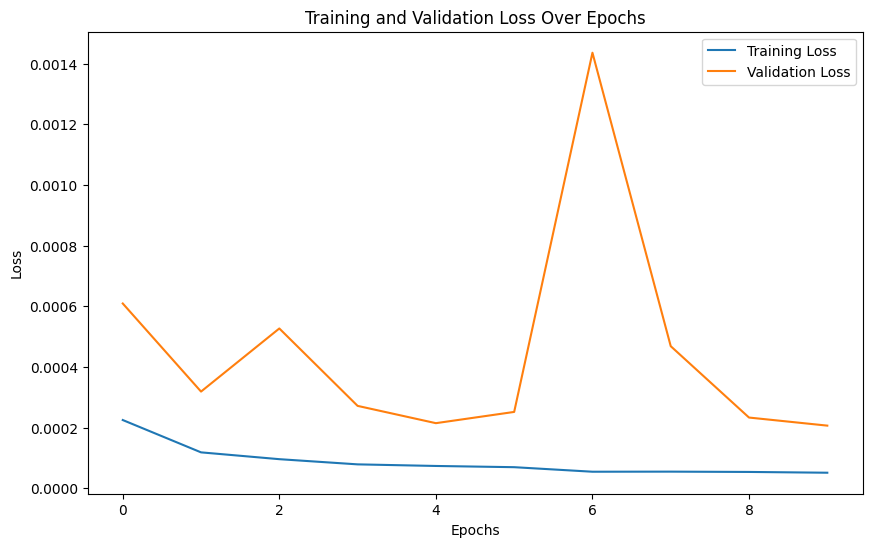

In [97]:
# Membuat model CNN-LSTM
model = Sequential()

# Lapisan CNN
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(100, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(MaxPooling1D(pool_size=3))
# model.add(Flatten())
# Lapisan LSTM
# model.add(LSTM(128, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
# Lapisan output
# model.add(Dense(25))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Model Summary
model.summary()

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_test, y_test))

# Visualisasi hasil training (grafik loss)
plt.figure(figsize=(10, 6))

# Plot training loss dan validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Menambahkan judul dan label
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Menampilkan grafik
plt.show()


### Evaluate and Predict

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3864e-04  
Model Test Loss: 0.00020622479496523738
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


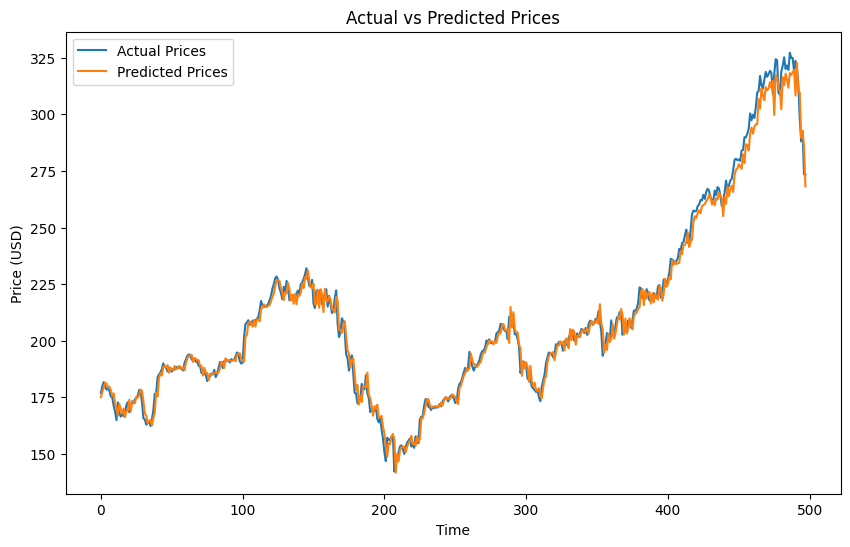

In [98]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Model Test Loss: {loss}')

# Membuat prediksi
y_pred = model.predict(X_test)

# Inversi skala hasil prediksi agar kembali ke skala harga asli
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:,0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], 4))), axis=1))[:,0]

# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Prices')
plt.plot(y_pred_inv, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Future Prediction

#### Predict one day ahead

In [99]:
# Ambil data terakhir sebanyak time_steps (30 hari terakhir dalam kasus kita)
last_sequence = df_scaled[-time_steps:]

# Ubah bentuk data agar sesuai dengan input model (1 sampel, 30 langkah waktu, 5 fitur)
last_sequence = np.expand_dims(last_sequence, axis=0)

# Lakukan prediksi
predicted_price_scaled = model.predict(last_sequence)

# Inversi skala prediksi agar kembali ke skala harga asli
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price_scaled, np.zeros((1, 4))), axis=1))[:,0]

print(f"Prediksi harga saham untuk hari berikutnya: {predicted_price[0]:.2f} USD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediksi harga saham untuk hari berikutnya: 267.98 USD


#### Predicting the Next Few Days

In [100]:
# Prediksi beberapa hari mendatang (misalnya 5 hari)
future_days = 30
predictions = []

# Mulai dengan data 30 hari terakhir
current_sequence = df_scaled[-time_steps:]

for day in range(future_days):
    # Ubah bentuk data agar sesuai dengan input model
    current_sequence_expanded = np.expand_dims(current_sequence, axis=0)
    
    # Prediksi harga untuk hari berikutnya
    predicted_price_scaled = model.predict(current_sequence_expanded)
    
    # Simpan prediksi yang sudah di-inversi skalanya
    predicted_price = scaler.inverse_transform(np.concatenate((predicted_price_scaled, np.zeros((1, 4))), axis=1))[:,0]
    predictions.append(predicted_price[0])
    
    # Update sequence: tambahkan prediksi terbaru (dengan 5 fitur) dan hapus hari pertama dari sequence
    predicted_price_full = np.concatenate((predicted_price_scaled, np.zeros((1, 4))), axis=1)  # Prediksi dengan placeholder untuk fitur lain
    new_sequence = np.concatenate((current_sequence[1:], predicted_price_full), axis=0)
    current_sequence = new_sequence

# Tampilkan hasil prediksi
print(f"Prediksi harga saham untuk {future_days} hari ke depan: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

#### Future Prediction

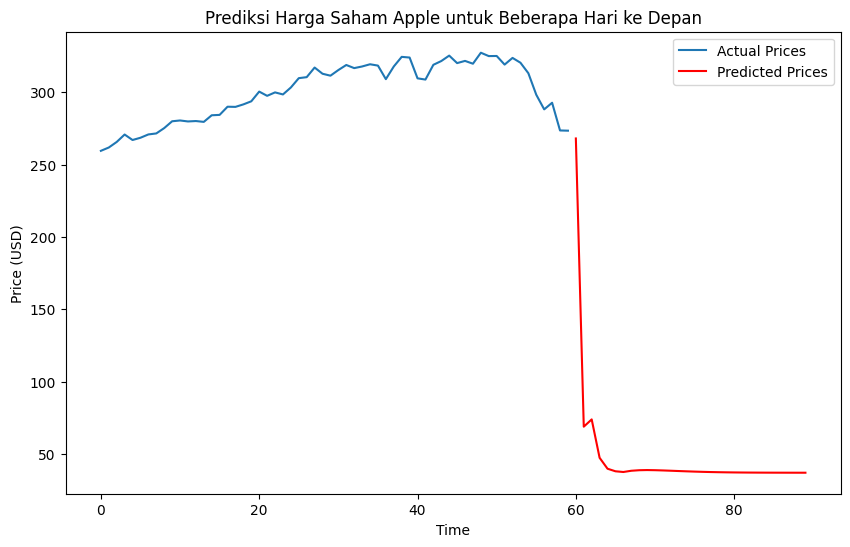

In [101]:
# Ambil harga penutupan asli untuk beberapa hari terakhir (misalnya 60 hari terakhir)
actual_prices = scaler.inverse_transform(df_scaled[-60:, :])[:, 0]

# Panjang dari data historis
historical_length = len(actual_prices)

# Indeks waktu untuk data historis (60 hari terakhir)
historical_time = range(historical_length)

# Indeks waktu untuk prediksi (mulai dari akhir data historis)
future_time = range(historical_length, historical_length + future_days)

# Visualisasi prediksi dan data historis
plt.figure(figsize=(10, 6))

# Plot data historis
plt.plot(historical_time, actual_prices, label='Actual Prices')

# Plot prediksi masa depan
plt.plot(future_time, predictions, label='Predicted Prices', color='red')

plt.title('Prediksi Harga Saham Apple untuk Beberapa Hari ke Depan')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
